In [41]:
import pandas as pd

DATA_URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

coverage_df = pd.read_csv(DATA_URL,
                          compression="gzip",
                          header=None
                          )

In [42]:
import seaborn as sns

coverage_no_hot_df = coverage_df.copy()
coverage_no_hot_df["soil_type"] = coverage_df.iloc[:,-41:-1].idxmax(axis=1)
coverage_no_hot_df["wilderness_type"] = coverage_df.iloc[:,-45:-41].idxmax(axis=1)

for column in coverage_df.iloc[:,-45:-1]:
    coverage_no_hot_df.drop(column,
                            axis=1,
                            inplace=True)
    
small_df = coverage_no_hot_df.sample(n=1000)
# sns.pairplot(small_df, hue=54)
# print("done")

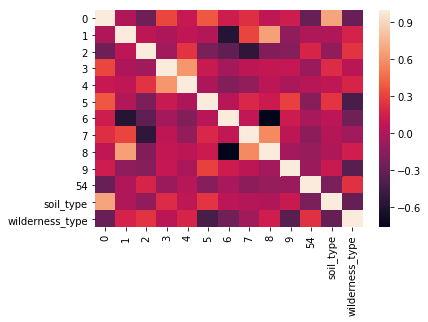

In [43]:
sns.heatmap(small_df.corr())

In [44]:
len(coverage_df) - coverage_df.count()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
dtype: int64

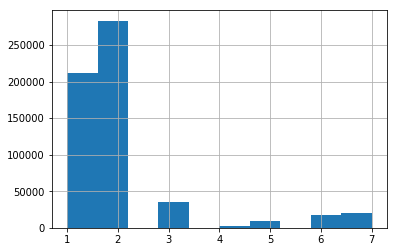

In [45]:
coverage_df[54].hist()

In [47]:
from sklearn import model_selection

small_df = coverage_df.sample(n=10000)

train_df, test_df = model_selection.train_test_split(small_df)

X_train = train_df.iloc[:, :-1].values
y_train = train_df[54].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df[54].values

In [57]:
from sklearn import pipeline,  svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids

# ev_clf = VotingClassifier([("kernel_svm", svm.SVC()), ("MLP", MLPClassifier()), ("boost", GradientBoostingClassifier())],
#                           voting="hard",
#                           n_jobs=4)

sampler = RandomOverSampler()
clf = RandomForestClassifier()

pipe_line = make_pipeline(
                         StandardScaler(),
                         sampler,
                         clf
                        )

pipe_line.fit(X_train, y_train)

pipe_line.score(X_test, y_test)

/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.768

In [58]:
import numpy as np
from sklearn.model_selection import cross_validate
scores = cross_validate(pipe_line, X_train, y_train, cv=10, scoring=["accuracy", "f1_macro"])

accuracy = scores["test_accuracy"]
f1score = scores["test_f1_macro"]
print("CV accuracy = {:.2f}\u00B1{:.2f}%".format(np.mean(accuracy)*100., 2*np.std(accuracy)*100.))
print("CV F1 = {:.2f}\u00B1{:.2f}".format(np.mean(f1score), 2*np.std(f1score)))

/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/

CV accuracy = 76.88±1.30%
CV F1 = 0.63±0.09


/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
from umap import UMAP

umap = UMAP()
X_reduced_umap = umap.fit_transform(X_train)

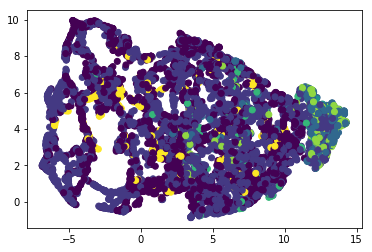

In [25]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced_umap[:,0], X_reduced_umap[:,1], c=y_train)
plt.show()

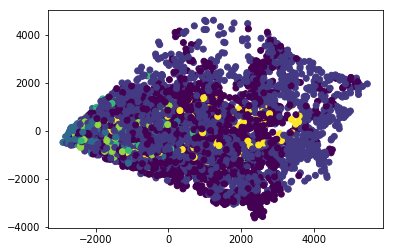

In [27]:
from sklearn.decomposition import PCA

linear_pca = PCA(n_components=2)
X_reduced_linear = linear_pca.fit_transform(X_train)

plt.scatter(X_reduced_linear[:,0], X_reduced_linear[:,1], c=y_train)
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [1, 10, 100, 200],
              'criterion': ("gini", "entropy"),
              'max_depth': [10, 100, 500]}

forest = RandomForestClassifier()

clf = GridSearchCV(forest, parameters, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 10, 100, 200], 'criterion': ('gini', 'entropy'), 'max_depth': [10, 100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
clf.cv_results_

/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/miMacbookPro/anaconda/envs/dataschool/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnin

{'mean_fit_time': array([0.00890422, 0.05497789, 0.52119427, 1.03481054, 0.01111999,
        0.09366779, 0.91951666, 1.84641848, 0.01328588, 0.09469681,
        0.92938719, 1.87756577, 0.0116992 , 0.07787623, 0.73424487,
        1.44966631, 0.01484017, 0.12798815, 1.20656142, 2.41330519,
        0.01639242, 0.12582693, 1.19689116, 2.38984909]),
 'std_fit_time': array([0.00146981, 0.00174696, 0.00585709, 0.00594397, 0.00034832,
        0.00338858, 0.00688681, 0.02316123, 0.00149074, 0.00250524,
        0.01520382, 0.0253583 , 0.00175535, 0.00127769, 0.01663322,
        0.01473161, 0.00046985, 0.00345046, 0.01042863, 0.01449819,
        0.00247466, 0.00394585, 0.01114875, 0.02152301]),
 'mean_score_time': array([0.00088415, 0.00313253, 0.02299218, 0.04387555, 0.00099721,
        0.0041038 , 0.03506193, 0.07204552, 0.00102816, 0.00422459,
        0.03717566, 0.07382007, 0.00090399, 0.00348125, 0.02632284,
        0.04811482, 0.0010849 , 0.00472741, 0.03606396, 0.07295651,
        0.001060

In [69]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
from sklearn.externals import joblib

joblib.dump(clf.best_estimator_, "classfier.pkl")

['classfier.pkl']

In [71]:
!ls

ML00-real_data_science.ipynb      Untitled.ipynb
ML01-supervised_learning.ipynb    Untitled1.ipynb
ML02-unsupervised_learning.ipynb  classfier.pkl
ML03-reinforcement_learning.ipynb ecoli.html
Multicore-TSNE


In [73]:
  = joblib.load("classfier.pkl")

In [75]:
classifer.predict(X_test)

array([1, 3, 2, ..., 2, 2, 2])

In [80]:
def predictor(x):
    classifer = joblib.load("classfier.pkl")
    
    return classifer.predict(x.reshape(1, -1))

In [81]:
predictor(X_test[0])

array([1])